**Импорт библиотек**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


**Считайте датасет из файла train.csv (это данные о выживаемости на Титанике)**

In [2]:
train_df = pd.read_csv('train.csv')
# Проверим, что данные корректно загрузились
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Визуализируйте распределение значений признаков Survived, Pclass, Age, Sex. Parch**


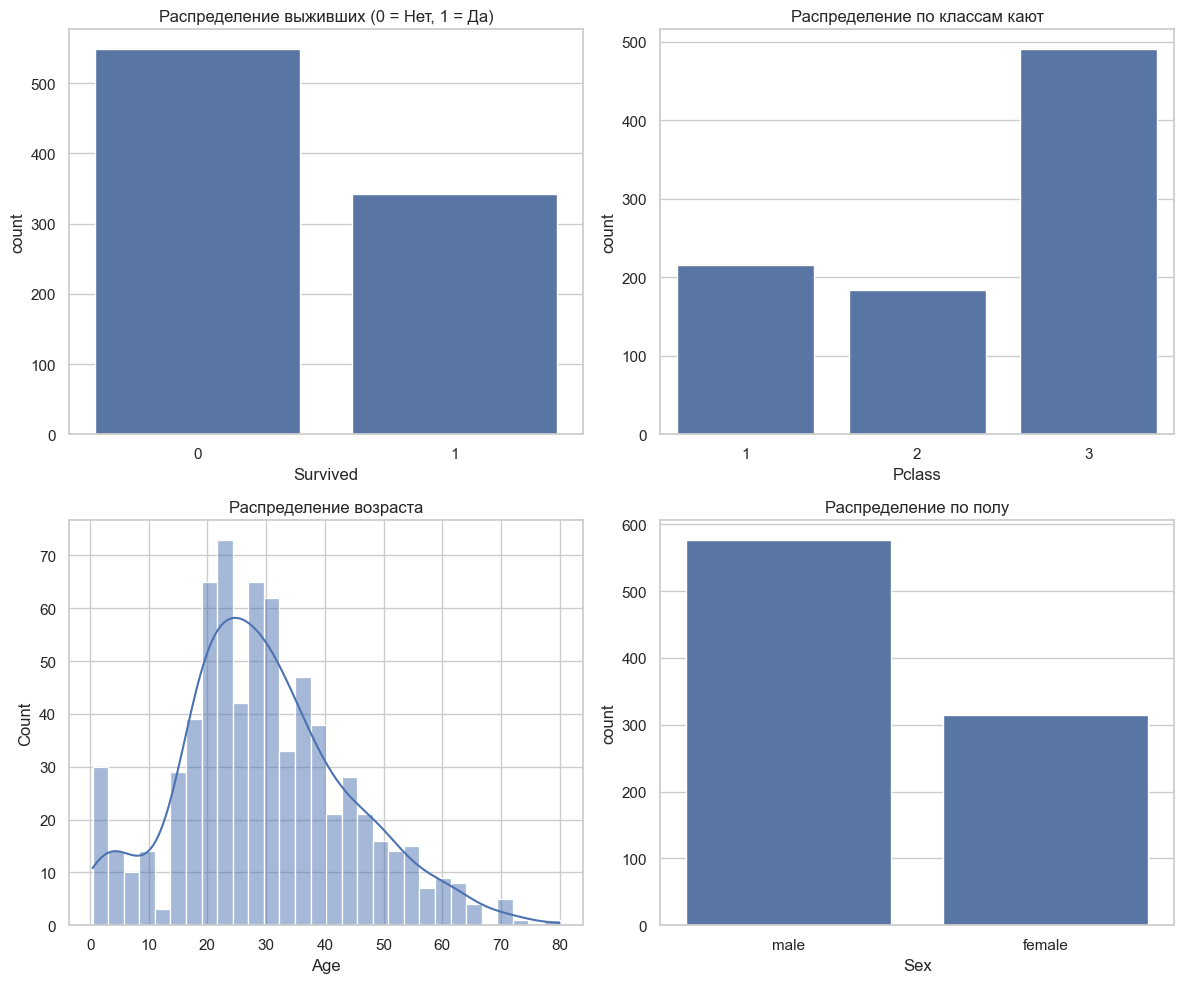

In [8]:
# Настройка стиля
sns.set(style="whitegrid")

# Создаем фигуру с подграфиками
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Распределение Survived
sns.countplot(x='Survived', data=train_df, ax=axes[0, 0])
axes[0, 0].set_title('Распределение выживших (0 = Нет, 1 = Да)')

# Распределение Pclass
sns.countplot(x='Pclass', data=train_df, ax=axes[0, 1])
axes[0, 1].set_title('Распределение по классам кают')

# Распределение Age
sns.histplot(train_df['Age'].dropna(), bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Распределение возраста')

# Распределение Sex
sns.countplot(x='Sex', data=train_df, ax=axes[1, 1])
axes[1, 1].set_title('Распределение по полу')

plt.tight_layout()
plt.show()


**Постройте график типа boxplot для столбца Age**


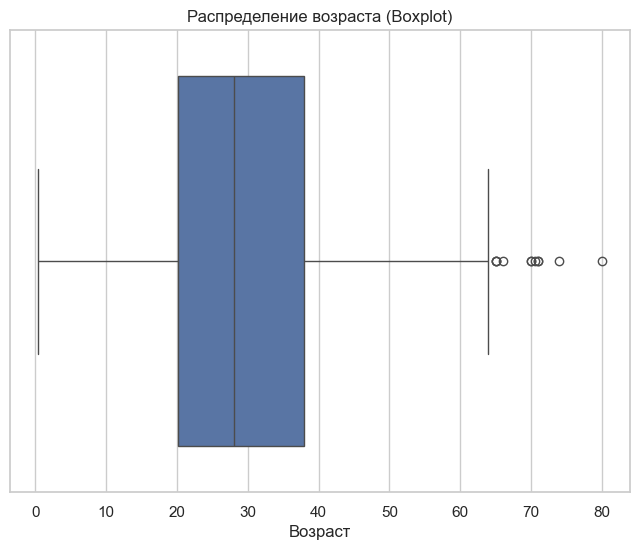

In [4]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=train_df['Age'].dropna())
plt.title('Распределение возраста (Boxplot)')
plt.xlabel('Возраст')
plt.show()


**Проинтепретируйте полученный график**


График показывает:

* Медиану (центральная линия) — около 28 лет.

* 25-й и 75-й перцентили (границы ящика) — ~20 и 38 лет.

* Выбросы (точки за "усами") — пожилые пассажиры (возраст > 65 лет).


**Постройте график типа pie chart для переменных Survived, Pclass, подпишите доли в процентах**


График типа pie chart для переменных Survived, Pclass

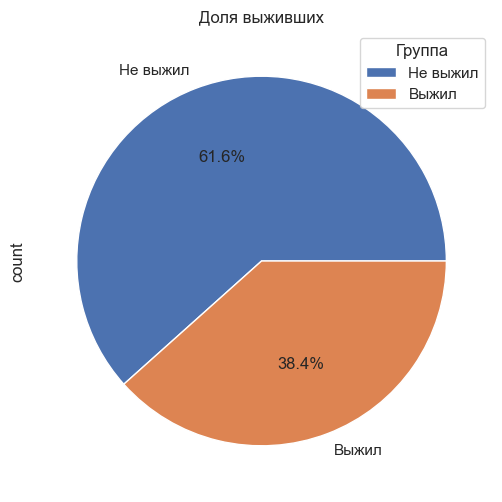

In [22]:
fig, axes = plt.subplots(1, 1, figsize=(12, 6))

# Для Survived
train_df['Survived'].value_counts().plot.pie(
    autopct='%1.1f%%', 
    labels=['Не выжил', 'Выжил'], 
    ax=axes
)
axes.set_title('Доля выживших')


plt.legend(loc='upper right', title='Группа', labels=['Не выжил', 'Выжил'])
plt.show()


График типа pie chart для переменных Pclass

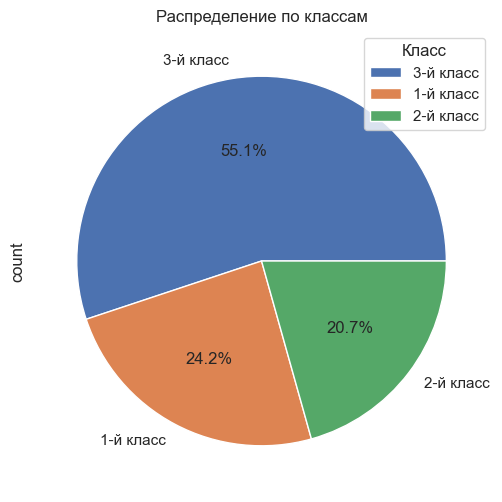

In [25]:
fig, axes = plt.subplots(1, 1, figsize=(12, 6))
# Для Pclass
train_df['Pclass'].value_counts().plot.pie(
    autopct='%1.1f%%', 
    labels=['3-й класс', '1-й класс', '2-й класс'], 
    ax=axes
)
axes.set_title('Распределение по классам')

plt.legend(loc='upper right', title='Класс', labels=['3-й класс', '1-й класс', '2-й класс'])
plt.show()

**Постройте график типа pairplot для всех числовых переменных датасета**


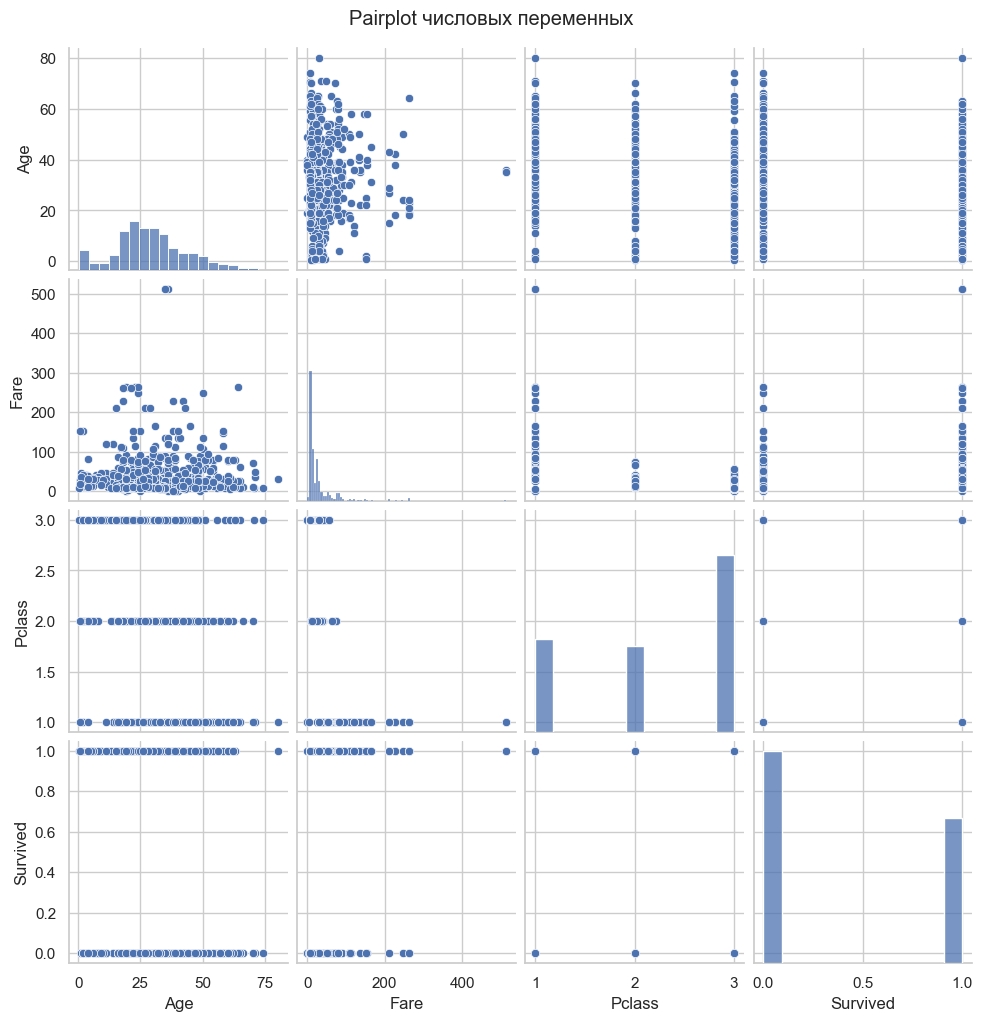

In [6]:
sns.pairplot(train_df[['Age', 'Fare', 'Pclass', 'Survived']].dropna())
plt.suptitle('Pairplot числовых переменных', y=1.02)
plt.show()


**Постройте интерактивный sunburst plot (визуализация иерархических данных) с помощью plotly. На первом уровне иерархии - количество пассажиров в каждом из классов, а на втором количество женщин/мужчин в этом классе**

In [7]:
# Подготовка данных
sunburst_data = train_df.groupby(['Pclass', 'Sex']).size().reset_index(name='count')

# Построение графика
fig = px.sunburst(
    sunburst_data,
    path=['Pclass', 'Sex'],
    values='count',
    title='Распределение пассажиров по классам и полу'
)
fig.update_layout(title_font_size=28)
fig.show()
